In [1]:

# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para aprendizado de máquina
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Importação e Análise Inicial
# Importe o arquivo CSV.(0,33)

# Exemplo: Importando um dataset do Kaggle
# Antes de rodar, certifique-se que a API do Kaggle está configurada e kaggle.json está em ~/.kaggle
# Instalar Kaggle caso não esteja instalado: 
!pip install kaggle

# Criar a pasta .kaggle
!mkdir -p ~/.kaggle

# Mover o kaggle.json (substitua pelo caminho real onde ele está)
!mv ~/Downloads/kaggle.json ~/.kaggle/

# Ajustar permissões
!chmod 600 ~/.kaggle/kaggle.json

# Testar a API
!kaggle datasets list

# Comando para baixar um dataset do Kaggle
# Exemplo: Dataset do Titanic
!kaggle datasets download -d jaderz/hospital-beds-management



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
mv: /Users/micheledeoliviocorrea/Downloads/kaggle.json: No such file or directory
ref                                                            title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset   Global Earthquake-Tsunami Risk Assessment Dataset        16151  2025-10-01 16:35:53.273000          13266        459  1.0              
jockeroika/life-style-data                                     Life Style Data                                        3995645  2025-10-14 13:50:45.303000          15579        326  0.8235294        
jaderz/hospit

In [2]:
!unzip -o hospital-beds-management.zip -d hospital_beds_dataset


Archive:  hospital-beds-management.zip
  inflating: hospital_beds_dataset/patients.csv  
  inflating: hospital_beds_dataset/services_weekly.csv  
  inflating: hospital_beds_dataset/staff.csv  
  inflating: hospital_beds_dataset/staff_schedule.csv  


In [3]:
# Carregar o dataset
dados = pd.read_csv("hospital_beds_dataset/patients.csv")
dados.head()

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


In [7]:
# Quantas linhas tem o dataset?(0,33) 1000 linhas
# Quantas colunas tem o dataset?(0,33) 7 colunas
# Quais colunas têm o tipo object?(0,34)   patient_id, name, arrival_date, departure_date, service
# Quais colunas têm o tipo int64?(0,34) age e satisfaction
# Existe alguma coluna de outro tipo?(0,33) não existe
# Exibir informações sobre o dataset

print('Info:', dados.info())

# Exibir dimensões do dataset
print('Shape:', dados.shape)

# Exibir estatísticas básicas
display(dados.describe())

# Colunas do tipo object (strings/categorias)
col_object = dados.select_dtypes(include='object').columns.tolist()
print("Colunas do tipo object:", col_object)

# Colunas do tipo int64
col_int = dados.select_dtypes(include='int64').columns.tolist()
print("Colunas do tipo int64:", col_int)

# Colunas de outro tipo (por exemplo datetime, float)
col_outros = dados.columns.difference(col_object + col_int).tolist()
print("Colunas de outro tipo:", col_outros)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            1000 non-null   object
 2   age             1000 non-null   int64 
 3   arrival_date    1000 non-null   object
 4   departure_date  1000 non-null   object
 5   service         1000 non-null   object
 6   satisfaction    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB
Info: None
Shape: (1000, 7)


,age,satisfaction
count,1000.000000,1000.000000
mean,45.337000,79.597000
std,25.999912,11.550325
min,0.000000,60.000000
25%,23.000000,70.000000
50%,46.000000,80.000000
75%,68.000000,89.250000
max,89.000000,99.000000


Colunas do tipo object: ['patient_id', 'name', 'arrival_date', 'departure_date', 'service']
Colunas do tipo int64: ['age', 'satisfaction']
Colunas de outro tipo: []


In [9]:
# Análise Estatística
# Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos (goal)?(0,66)
# Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado (pledged)?(0,67)
# Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos(backers)?(0,67)
# Vou adaptar para os campos age e satisfaction
# --- Estatísticas da coluna 'age' ---
# Total: 45337
# Mínimo: 0
# Máximo: 89
# 25% (1º quartil): 23.0
# 50% (mediana): 46.0
# 75% (3º quartil): 68.0

# --- Estatísticas da coluna 'satisfaction' ---
# Total: 79597
# Mínimo: 60
# Máximo: 99
# 25% (1º quartil): 70.0
# 50% (mediana): 80.0
# 75% (3º quartil): 89.25


colunas = ['age', 'satisfaction']

for coluna in colunas:
    print(f"--- Estatísticas da coluna '{coluna}' ---")
    
    total = dados[coluna].sum()
    minimo = dados[coluna].min()
    maximo = dados[coluna].max()
    q25 = dados[coluna].quantile(0.25)  # 25% dos dados abaixo deste valor
    q50 = dados[coluna].quantile(0.50)  # mediana
    q75 = dados[coluna].quantile(0.75)  # 75% dos dados abaixo deste valor
    
    print(f"Total: {total}")
    print(f"Mínimo: {minimo}")
    print(f"Máximo: {maximo}")
    print(f"25% (1º quartil): {q25}")
    print(f"50% (mediana): {q50}")
    print(f"75% (3º quartil): {q75}\n")

--- Estatísticas da coluna 'age' ---
Total: 45337
Mínimo: 0
Máximo: 89
25% (1º quartil): 23.0
50% (mediana): 46.0
75% (3º quartil): 68.0

--- Estatísticas da coluna 'satisfaction' ---
Total: 79597
Mínimo: 60
Máximo: 99
25% (1º quartil): 70.0
50% (mediana): 80.0
75% (3º quartil): 89.25



In [16]:
# Análise de Categorias
# Qual a category mais presente? E quantos valores únicos ela possui?(0,5)
# Qual a main_category mais presente? E quantos valores únicos ela possui?(0,5)
# Qual a currency mais presente? E quantos valores únicos ela possui?(0,5)
# Execute o processo de dummy na coluna country.(0,5)
# Vou adaptar para
# Qual o service mais presente? E quantos valores únicos ela possui?(0,5) emergency e possui 4 valores únicos
# Execute o processo de dummy na coluna service.(0,5)

# Quantos valores únicos existem na coluna 'service'
num_unicos = dados['service'].nunique()
unicos = dados['service'].unique()

# Qual o service mais frequente
mais_presente = dados['service'].value_counts().idxmax()
frequencia = dados['service'].value_counts().max()

print("Service mais presente:", mais_presente)
print("Frequência do service mais presente:", frequencia)
print("Número de valores únicos em 'service':", num_unicos)
print("Valores distintos de service:", unicos)

# Verificar valores ausentes
display(dados.isnull().sum().sort_values(ascending=False))

dados_limpos = dados.copy()

# Remover duplicatas
antes = dados_limpos.shape[0]
dados_limpos.drop_duplicates(inplace=True)
depois = dados_limpos.shape[0]
print(f'Duplicatas removidas: {antes - depois}')

dados_onehot = dados_limpos.copy()
# ONE-HOT ENCODING: cria colunas dummies para categorias
dados_onehot = pd.get_dummies(dados_onehot, columns=['service'], drop_first=False, dtype=int)
print('Formato após One-Hot:', dados_onehot.shape)
display(dados_onehot.head())

Service mais presente: emergency
Frequência do service mais presente: 263
Número de valores únicos em 'service': 4
Valores distintos de service: ['surgery' 'general_medicine' 'emergency' 'ICU']


patient_id        0
name              0
age               0
arrival_date      0
departure_date    0
service           0
satisfaction      0
dtype: int64

Duplicatas removidas: 0
Formato após One-Hot: (1000, 10)


,patient_id,name,age,arrival_date,departure_date,satisfaction,service_ICU,service_emergency,service_general_medicine,service_surgery
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,61,0,0,0,1
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,83,0,0,0,1
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,83,0,0,1,0
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,81,0,1,0,0
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,76,1,0,0,0


In [36]:
# Análise de Valores Nulos
# Qual a quantidade de valores nulos em cada feature?(0,66) 0
# Qual a proporção de valores nulos por valores não nulos em cada feature?(0,66)
# Faça o tratamento desses nulos e explique por que escolheu cada método.(0,68)
# Não existem valores nulos para o database que escolhi, 
# mas para os campos com float, eu usaria mediana, para contornar outliers; 
# nos outros campos object, eu criaria uma categoria "Não informado". 
# Eu acho que para este database, em que é simulado a operação de um hospital e fluxo de pessoas que circulam nele, 
# seria importante saber a quantidade de pessoas que precisaram de atendimento ali. Então, para mim, eu não desconsideraria 
# alguma linha por falta de informações, como, por exemplo, id e nome, que parecem identificadores importantes. 
# Eu acho que não faz sentido usar moda para a categoria de service, já que os dados estão bem distribuídos para esta coluna. 
# Para o caso de conseguir analisar quantas pessoas estiveram no hospital em um periodo, eu indicaria que essas colunas são nulas 
# e eliminaria da minha lógica. 

# Quantidade de valores nulos por coluna
print("Valores nulos:\n", dados.isnull().sum())

# Proporção de nulos por coluna (nulos / não nulos)
print("Proporção:\n", dados.isnull().sum() / dados.notnull().sum())

# Imputação para colunas numéricas com mediana
num_cols = dados_limpos.select_dtypes(include=[np.number]).columns
medianas = dados_limpos[num_cols].median()
dados_limpos[num_cols] = dados_limpos[num_cols].fillna(medianas)

# Preencher colunas categóricas (object) com 'Não informado'
cols_categoricas = dados_limpos.select_dtypes(include='object').columns
dados_limpos[cols_categoricas] = dados_limpos[cols_categoricas].fillna('Não informado')

# Indicar colunas com data como missing
dados_limpos["arrival_date_missing"] = dados["arrival_date"].isna().astype(int)
dados_limpos["departure_date_missing"] = dados["departure_date"].isna().astype(int)

Valores nulos:
 patient_id        0
name              0
age               0
arrival_date      0
departure_date    0
service           0
satisfaction      0
dtype: int64
Proporção:
 patient_id        0.0
name              0.0
age               0.0
arrival_date      0.0
departure_date    0.0
service           0.0
satisfaction      0.0
dtype: float64


total para especialidade: service
emergency           263
surgery             254
general_medicine    242
ICU                 241
Name: count, dtype: int64


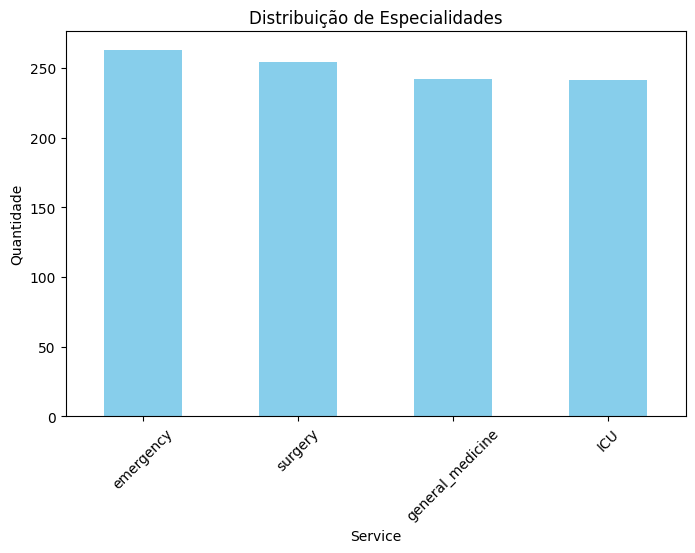

In [30]:
# Visualização Gráfica
# Visualização Gráfica da feature state.(2)

contagem_service = dados_limpos['service'].value_counts()
print("total para especialidade:", contagem_service)
# Gráfico da feature service
plt.figure(figsize=(8,5))
contagem_service.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Especialidades')
plt.xlabel('Service')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()



Distribuições numéricas


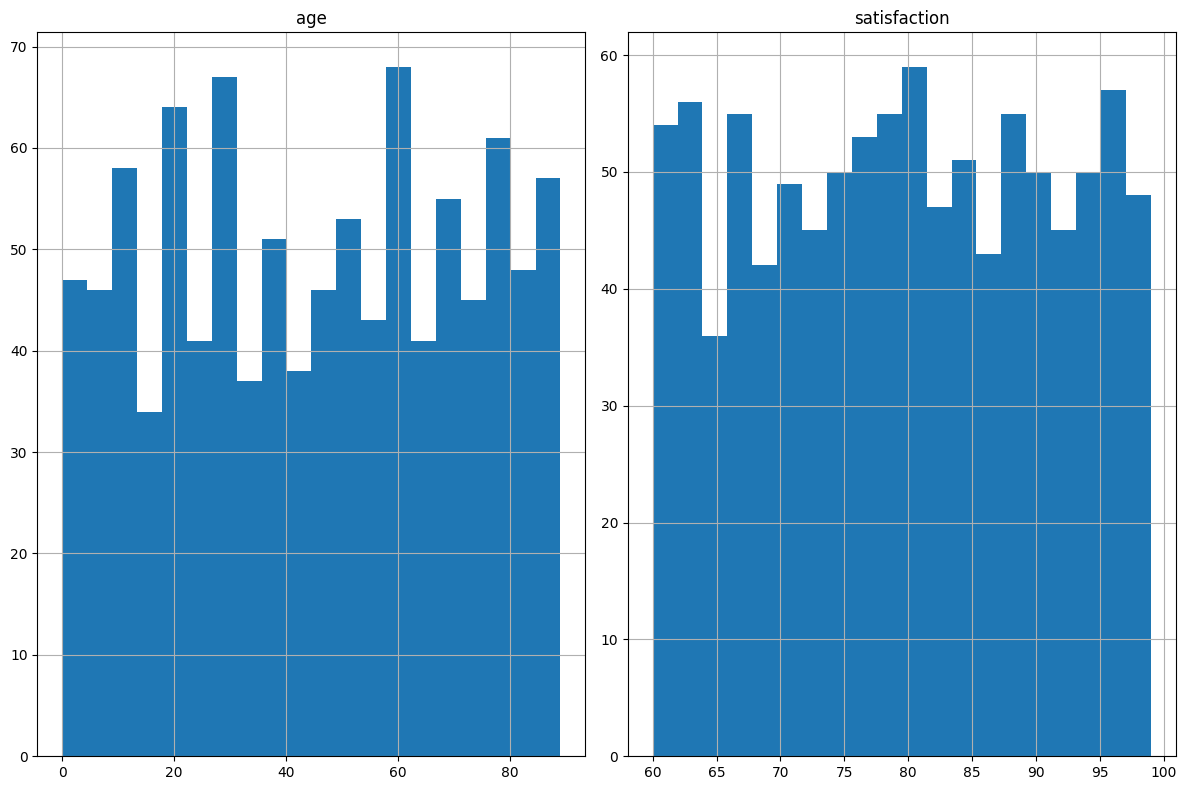

In [32]:
# Distribuições numéricas (histogramas)
print("Distribuições numéricas")
num_cols = dados_limpos.select_dtypes(include=[np.number]).columns.tolist()
if num_cols:
    dados[num_cols].hist(figsize=(12, 8), bins=20)
    plt.tight_layout()
    plt.show()



Distribuições categóricas


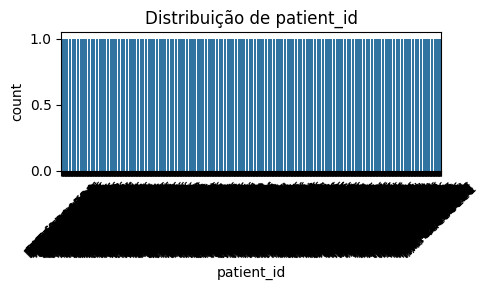

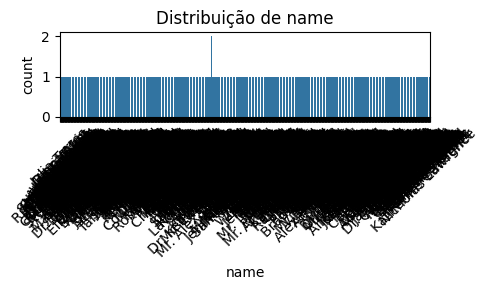

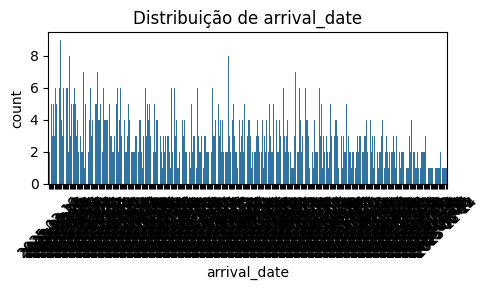

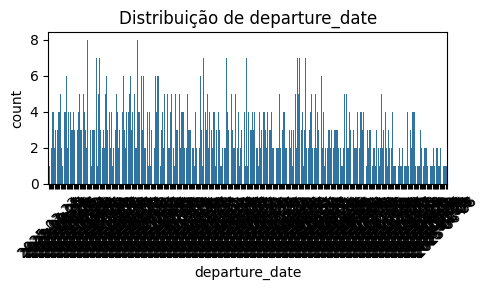

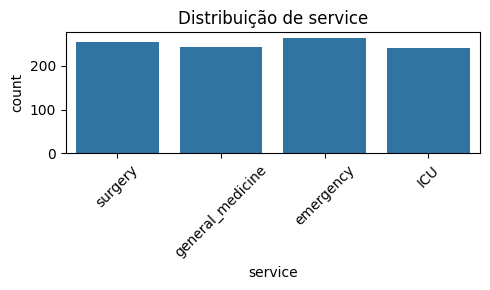

In [33]:
# Distribuições categóricas (countplot)
print("Distribuições categóricas")
cat_cols = dados.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols[:6]:  # limitar para visualização rápida
    plt.figure(figsize=(5,3))
    sns.countplot(x=c, data=dados)
    plt.title(f'Distribuição de {c}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Mapa de correlação


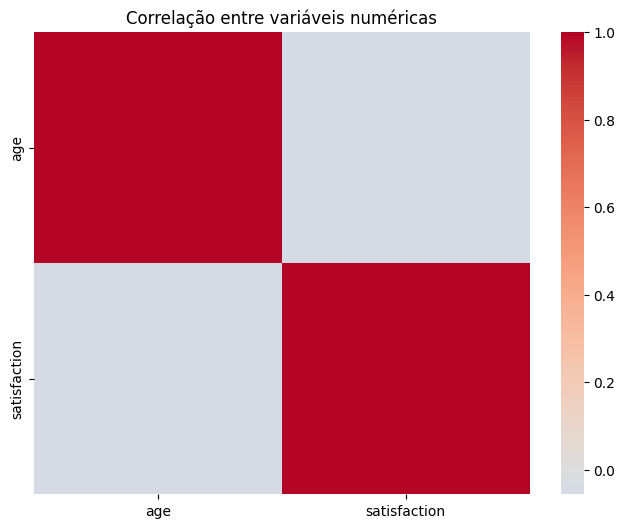

In [34]:
# Mapa de correlação (apenas colunas numéricas)
print("Mapa de correlação")

if len(num_cols) >= 2:
    plt.figure(figsize=(8,6))
    corr = dados[num_cols].corr()
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlação entre variáveis numéricas')
    plt.show()